<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/naive_bayes_knn_cogumelo_venenoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Este conjunto de dados inclui descrições de amostras hipotéticas correspondentes a 23 espécies de cogumelos guelados na família de cogumelos Agaricus e Lepiota, extraídas do Guia de campo da Audubon Society to North American Mushrooms (1981). Cada espécie é identificada como definitivamente comestível, definitivamente venenosa ou de comestibilidade desconhecida e não recomendada. Esta última classe foi combinada com a venenosa. O Guia afirma claramente que não existe uma regra simples para determinar a comestibilidade de um cogumelo; nenhuma regra como "folhetos três, deixe estar" para Carvalho Venenoso e Ivy

Informações de atributos: 

ALVO : (classes: comestíveis = e, venenosos = p)

forma de capa: sino = b, cônico = c, convexo = x, plano = f, saliente = k, afundado = s

superfície da capa: fibrosa = f, sulcos = g, escamosa = y, lisa = s

cor da tampa: marrom = n, amarelo-claro = b, canela = c, cinza = g, verde = r, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y

hematomas: hematomas = t, não = f

odor: amêndoa = a, anis = l, creosoto = c, peixe = y, fétido = f, mofo = m, nenhum = n, pungente = p, picante = s

anexo de brânquia: anexado = a, descendente = d, livre = f, entalhado = n

espaçamento de guelras: próximo = c, lotado = w, distante = d

tamanho da guelra: largo = b, estreito = n

cor de guelras: preto = k, marrom = n, amarelo-claro = b, chocolate = h, cinza = g, verde = r, laranja = o, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y

forma de haste: ampliação = e, afilamento = t

raiz do caule: bulboso = b, clube = c, xícara = u, igual = e, rizomorfos = z, enraizado = r, ausente =?

superfície da haste acima do anel: fibroso = f, escamoso = y, sedoso = k, liso = s

superfície do caule abaixo do anel: fibroso = f, escamoso = y, sedoso = k, liso = s

talo-cor-acima do anel: marrom = n, amarelo = b, canela = c, cinza = g, laranja = o, rosa = p, vermelho = e, branco = w, amarelo = y

stalk-color-below-ring: brown = n, buff = b, cannamon = c, grey = g, orange = o, pink = p, red = e, white = w, yellow = y

tipo de véu: parcial = p, universal = u

cor do véu: marrom = n, laranja = o, branco = w, amarelo = y

número do anel: nenhum = n, um = o, dois = t

tipo de anel: teia de aranha = c, evanescente = e, alargamento = f, grande = l, nenhum = n, pendente = p, revestimento = s, zona = z

spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y

população: abundante = a, agrupado = c, numeroso = n, espalhado = s, vários = v, solitário = y

habitat: gramíneas = g, folhas = l, prados = m, caminhos = p, urbano = u, resíduos = w, bosques = d





..........................................................................

**Objetivo:** É seu trabalho como engenheiro da computação prever se o cogumelo é venenoso ou comestível, ou seja, criar um modelo para isso.

**Itens que você deve cumprir**:

*   Mostrar informações do data_set (head,info,describe)
*   Verificar dados faltantes, se houver, fazer tratamento. 
*   Detectar atributos categóricos.
*   Utilizar Ordinal Encoding ou One hot encoding para transformar os atributos em “números”, você escolhe a técnica.
*   Separar os dados em x_train,x_test,y_train,y_test 
*   Aplicar o técnica de Naive Bayes e verificar o score (accuracy_score)
*   Aplicar o técnica de KNN e verificar o score (accuracy_score)
*   Variar K do modelo KNN entre (1 e 100) e apresentar um gráfico da evolução de K e o accuracy_score (você pode utilizar o erro ((np.mean(pred_i != y_test))para substituir o accuracy_score)



In [ ]:
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns #biblioteca utilizada para construir os gráficos
from sklearn.feature_selection import RFE #biblioteca para aplicação RFE
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import  accuracy_score # Importando métricas para validação do modelo
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


**Apresentar informações do data_frame (head, info, describe)**

In [ ]:
nome_do_arquivo="mushrooms.csv" 
dataframe = pd.read_csv(nome_do_arquivo)

In [ ]:
dataframe.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
dataframe.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Varificar os dados nulos, e fazer possíveis tratamentos**

In [ ]:
dataframe.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**Detectar atributos categóricos. Utilizar Ordinal Encoding ou One hot encoding para transformar os atributos em “números”, você escolhe a técnica.**


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

In [ ]:
x = dataframe[['bruises','odor','gill-size','gill-color','veil-type','spore-print-color','ring-number','ring-type','habitat']]

In [ ]:
enc.fit(x)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [ ]:
enc.categories_

[array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['p'], dtype=object),
 array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype=object)]

In [ ]:
x_transformed = enc.transform(x)

In [ ]:
y = dataframe[['class']]

In [ ]:
enc2 = OrdinalEncoder()

In [ ]:
enc2.fit(y)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [ ]:
enc2.categories_

[array(['e', 'p'], dtype=object)]

In [ ]:
y_transformed = enc2.transform(y)

**Separar os dados em x_train,x_test,y_train,y_test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x2 = x_transformed

In [ ]:
y2 = y_transformed

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

** **Aplicar o técnica de Naive Bayes** **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
cols = ["dado", "valor"]
dados = pd.DataFrame(np.array(["x1",7],["x2",12],["x3",2],["x4",21],["x5",66]),columns=cols)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dados)

ValueError: ignored

In [ ]:
dados = [30,20,15,155,2]

In [ ]:
padronizado = scale(dados)

In [ ]:
padronizado

array([-0.25700194, -0.43547551, -0.52471229,  1.97391766, -0.75672793])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()

In [ ]:
model_NB.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_NB = model_NB.predict(x_test)

**Verificar o score (accuracy_score)**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,pred_NB)

0.803804550540843

**Aplicar o técnica de KNN **

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=13)

In [ ]:
model_KNN.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
pred_KNN = model_KNN.predict(x_test)

**Verificar o score (accuracy_score)**

In [ ]:
accuracy_score(y_test,pred_KNN)

0.9966430436404327

**Variar K do modelo KNN entre (1 e 100) e apresentar um gráfico da evolução de K e o accuracy_score (você pode utilizar o erro ((np.mean(pred_i != y_test))para substituir o accuracy_score)**

In [ ]:
K_n = 100
k_list = []
acc_list = []

In [ ]:
for x in range(1, K_n):
  model_KNN = KNeighborsClassifier(n_neighbors=x)
  model_KNN.fit(x_train,y_train)
  pred_KNN = model_KNN.predict(x_test)
  acc = accuracy_score(y_test,pred_KNN)
  k_list.append(x)
  acc_list.append(acc)

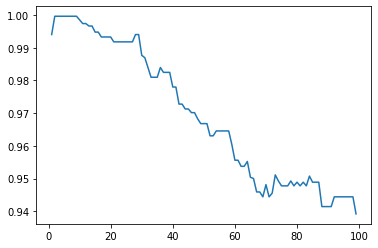

In [ ]:
sns.lineplot(x=k_list, y=acc_list)